In [101]:
import seaborn as sns
from matplotlib import pyplot as plt
import os

def find_files(fileptr, search_path):
    
    result = []
    # Wlaking top-down from the root
    for root, dir, files in os.walk(search_path):
        for f_name in files:
            if fileptr in f_name:
                result.append(f_name)
    
    result.sort()
    return result
nExp = 28

dir_exp = './OutPlots/'
file_name = '{}-Desc_Beam'.format(nExp)

all_files = find_files(file_name, dir_exp)
enumerate_files = list(enumerate(all_files, start=1))
enumerate_files.append((0,"Exit"))


In [102]:
import numpy as np
from pandas import DataFrame 

def get_instance(file_path):
    index_apertures = 0
    intensity = None
    ID_BEAM = None
    intensity_matrix = []
    current_aperture = []
    instance_content = {
                        'Score': 0,
                        'Beam': None,
                        'Intensity': None, 
                        'Apertures': {},
                        'Intensities': {}
                        }

    complete_file = open (file_path, 'r')

    on_intensity = True
    for line in complete_file.readlines():

        line = line.strip().split(',')
        if len(line) < 2:
            continue

        

        if line[0] == 'Aperture':
            on_intensity = False

        if on_intensity:

            if line[0] == 'Beam':
                ID_BEAM = int(line[1])
                instance_content['Beam'] = ID_BEAM
            elif line[0] == 'Score':
                instance_content['Score'] = float(line[1]) 
            else:
                line.pop()
                row = np.array([float(x) for x in line])
                intensity_matrix.append(row)
        else:

            if line[0] == 'Aperture':

                if index_apertures != 0:
                    current_aperture = DataFrame(np.matrix(current_aperture))
                    instance_content['Apertures'][index_apertures-1] = current_aperture
                    instance_content['Intensities'][index_apertures-1] = intensity
                    current_aperture = []

                intensity = float(line[1])
                index_apertures+=1    

            else:
                line.pop()
                row = np.array([float(x) for x in line])
                current_aperture.append(row)

    intensity_frame = DataFrame(np.matrix(intensity_matrix))
    current_aperture = DataFrame(np.matrix(current_aperture))
    instance_content['Intensity'] = intensity_frame
    instance_content['Apertures'][index_apertures-1] = current_aperture
    instance_content['Intensities'][index_apertures-1] = intensity

    return instance_content

AVAILABLES FILES:
1 - 52-Desc_Beam0.txt
2 - 52-Desc_Beam140.txt
3 - 52-Desc_Beam210.txt
4 - 52-Desc_Beam280.txt
5 - 52-Desc_Beam70.txt
0 - Exit


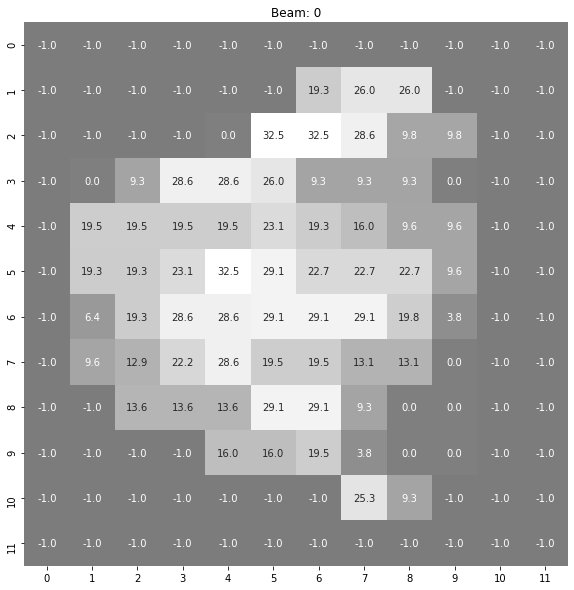

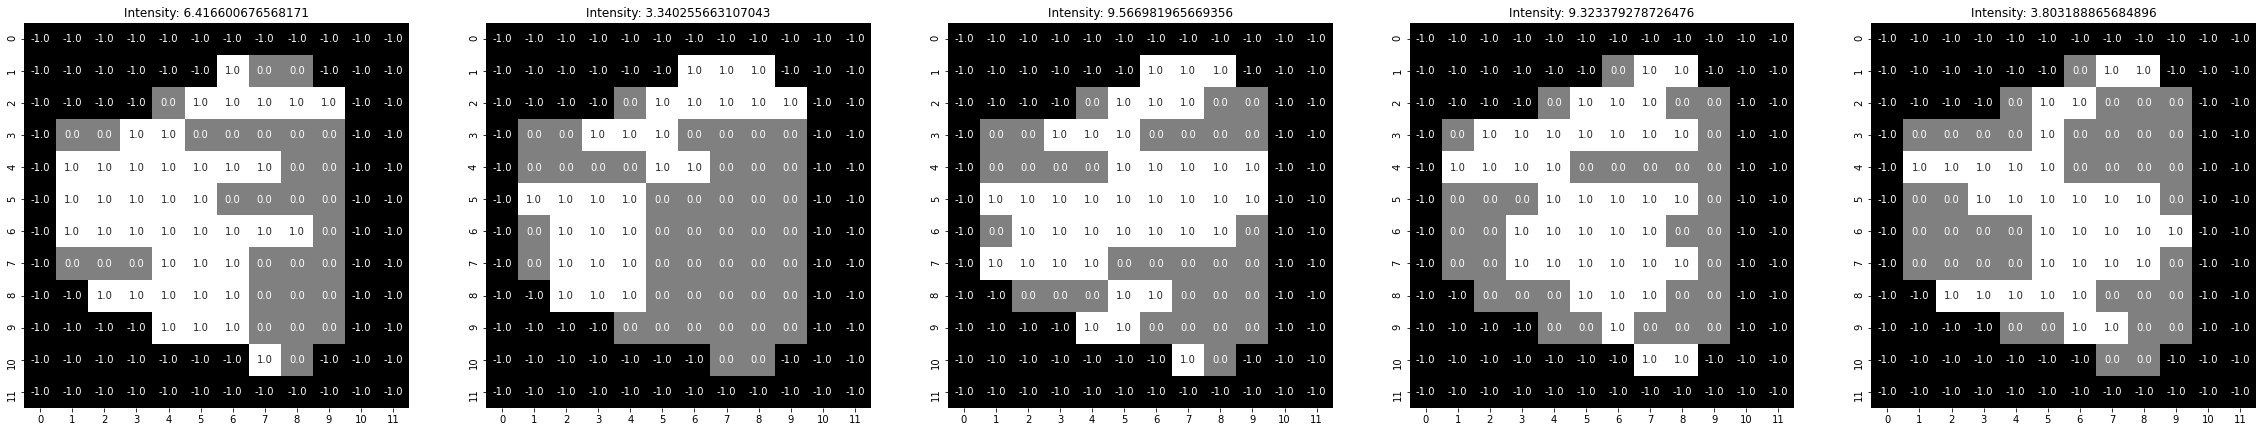

AVAILABLES FILES:
1 - 52-Desc_Beam0.txt
2 - 52-Desc_Beam140.txt
3 - 52-Desc_Beam210.txt
4 - 52-Desc_Beam280.txt
5 - 52-Desc_Beam70.txt
0 - Exit


In [103]:
budget = True

while budget:
    print("AVAILABLES FILES:")
    for index, files in enumerate_files:
        print("{} - {}".format(index,files))

    try:
        option = int(input("File Option"))
    except ValueError:
        print("ERROR Option")
        continue

    if option == 0:
        budget=False
        break
    else:

        file_option = enumerate_files[option-1]
        dir_file = dir_exp + file_option[1]
        instance_content = get_instance(dir_file)
        colors = sns.color_palette("gray", as_cmap=True)

        # Grafica de la Matriz de intensidad
        fig_intensity, ax_intensity = plt.subplots(1,1, figsize=(10,10))
        sns.heatmap(instance_content['Intensity'], center=0, cmap=colors, \
                    annot=True, fmt='.1f', ax=ax_intensity, cbar=False, square=True)
        ax_intensity.set_title('Beam: {}'.format(instance_content['Beam']))        

        # Grafica de conjunto de aperturas con sus intensidades
        index_apertures = instance_content['Apertures'].keys()
        fig, ax =plt.subplots(1,len(index_apertures), figsize=(40,40))

        for index in index_apertures:
            sns.heatmap(instance_content['Apertures'][index], center=0, cmap=colors, \
                        annot=True, fmt='.1f', ax=ax[index], cbar=False, square=True)
            ax[index].set_title('Intensity: {}'.format(instance_content['Intensities'][index]))

        plt.show()

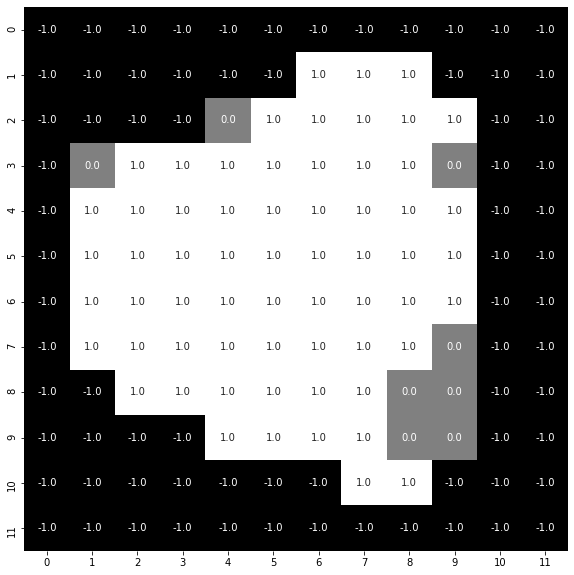

In [104]:
import seaborn as sns

## Plot Aperture
beam_selected = 0
aperture_file = "/TransposedMatrixBeam{}.txt".format(beam_selected)
dir_file = dir_exp + aperture_file

complete_file = open (dir_file, 'r')

on_intensity = True

beam_knowledge = None

transpose_matrix = []
colors = sns.color_palette("gray", as_cmap=True)

for line in complete_file.readlines():
    line = line.strip().split(',')
    ##print(line)
    if line[0] == 'Aperture':
        on_intensity = False
    if on_intensity:
        
        if line[0] == 'Beam':
            ID_BEAM = int(line[1])
            beam_knowledge = ID_BEAM
        
        else:
            line.pop()
            row = np.array([float(x) for x in line])
            #print(row)
            transpose_matrix.append(row)

transpose_matrix.pop()
transpose_matrix = DataFrame(np.matrix(transpose_matrix))
#print(transpose_matrix)

# Grafica de la Matriz de intensidad
fig_intensity, ax_intensity = plt.subplots(1, figsize=(10,10))
sns.heatmap(transpose_matrix, center=0, cmap=colors, annot=True, fmt='.1f', cbar=False, square=True)

plt.show()